## EA run comparison

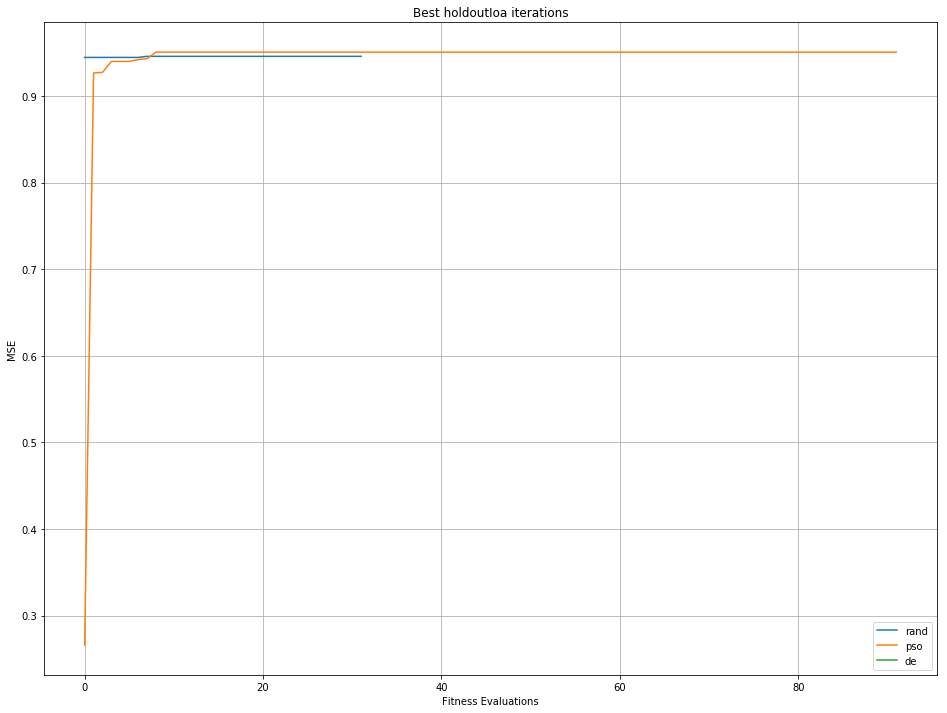

In [114]:
import pandas as pd
import numpy as np

def getMinimizingArray(df, column):
    minsArray = []
    minValue = df[column][0]
    for value in np.array(df[column]):
        if value < minValue:
            minValue = value
        minsArray.append(minValue)    
    return np.array(minsArray)   

def getMaximizingArray(df, column):
    maxArray = []
    maxValue = df[column][0]
    for value in np.array(df[column]):
        if value > maxValue:
            maxValue = value
        maxArray.append(maxValue)    
    return np.array(maxArray)  

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/runs/4gpu3Pso1RandAgents20Iters30IslandsEvery5RoundRobin/logs/"

randDf = pd.read_csv(fpath + randFname)
randDf["datetime"] = pd.to_datetime(randDf["datetime"])

psoDf = pd.read_csv(fpath + psoFname)
psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])

deDf = pd.read_csv(fpath + deFname)
deDf["datetime"] = pd.to_datetime(psoDf["datetime"])

# column = "cvMseMean"
column = "holdoutIoa"
steps = 120
psoMseMin = getMaximizingArray(psoDf.head(steps), column)
randMseMin = getMaximizingArray(randDf.head(steps), column)
deMseMin = getMaximizingArray(deDf.head(steps), column)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel('MSE')
ax.set_xlabel('Fitness Evaluations')
ax.set_title('Best {} iterations'.format(column))
ax.grid(True)
ax.plot(randMseMin);
ax.plot(psoMseMin);
ax.plot(deMseMin);
ax.legend(["rand", "pso", "de"]);

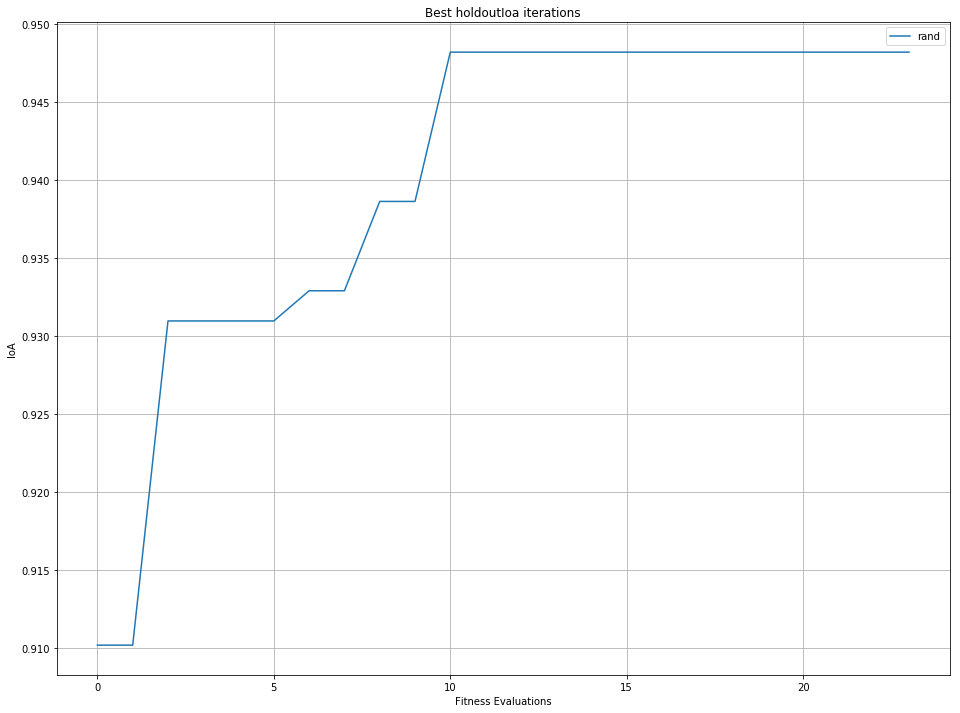

In [98]:
fpath = "../models/NarxModelSearch/runs/2gpu2PsoAgents20Iters30IslandsEvery5RoundRobin/logs/"

# randDf = pd.read_csv(fpath + randFname)
# randDf["datetime"] = pd.to_datetime(randDf["datetime"])
psoDf = pd.read_csv(fpath + psoFname)
psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
# deDf = pd.read_csv(fpath + deFname)
# deDf["datetime"] = pd.to_datetime(psoDf["datetime"])

column = "holdoutIoa"
steps = 30
psoMseMin = getMaximizingArray(psoDf.head(steps), column)
randMseMin = getMaximizingArray(randDf.head(steps), column)
deMseMin = getMaximizingArray(deDf.head(steps), column)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel('IoA')
ax.set_xlabel('Fitness Evaluations')
ax.set_title('Best {} iterations'.format(column))
ax.grid(True)
# ax.plot(randMseMin);
ax.plot(psoMseMin);
# ax.plot(deMseMin);
ax.legend(["rand", "pso", "de"]);

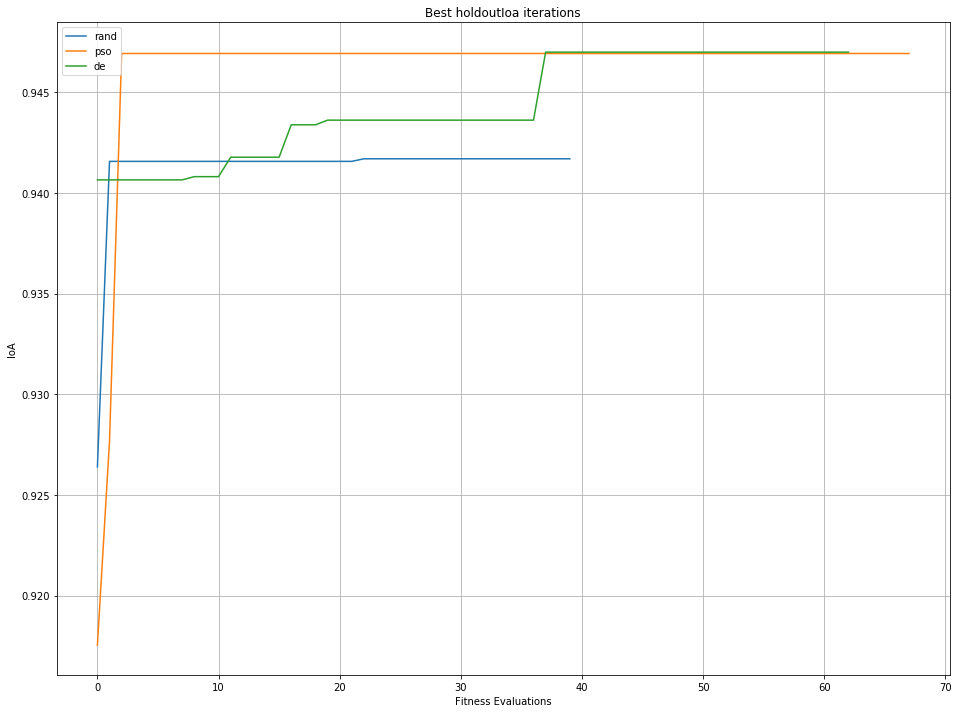

In [99]:
fpath = "../models/NarxModelSearch/runs/4gpu46stationAssymetric6LSTM/logs/"

randDf = pd.read_csv(fpath + randFname)
randDf["datetime"] = pd.to_datetime(randDf["datetime"])
psoDf = pd.read_csv(fpath + psoFname)
psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
deDf = pd.read_csv(fpath + deFname)
deDf["datetime"] = pd.to_datetime(psoDf["datetime"])

column = "holdoutIoa"
steps = 70
psoMseMin = getMaximizingArray(psoDf.head(steps), column)
randMseMin = getMaximizingArray(randDf.head(steps), column)
deMseMin = getMaximizingArray(deDf.head(steps), column)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel('IoA')
ax.set_xlabel('Fitness Evaluations')
ax.set_title('Best {} iterations'.format(column))
ax.grid(True)
ax.plot(randMseMin);
ax.plot(psoMseMin);
ax.plot(deMseMin);
ax.legend(["rand", "pso", "de"]);

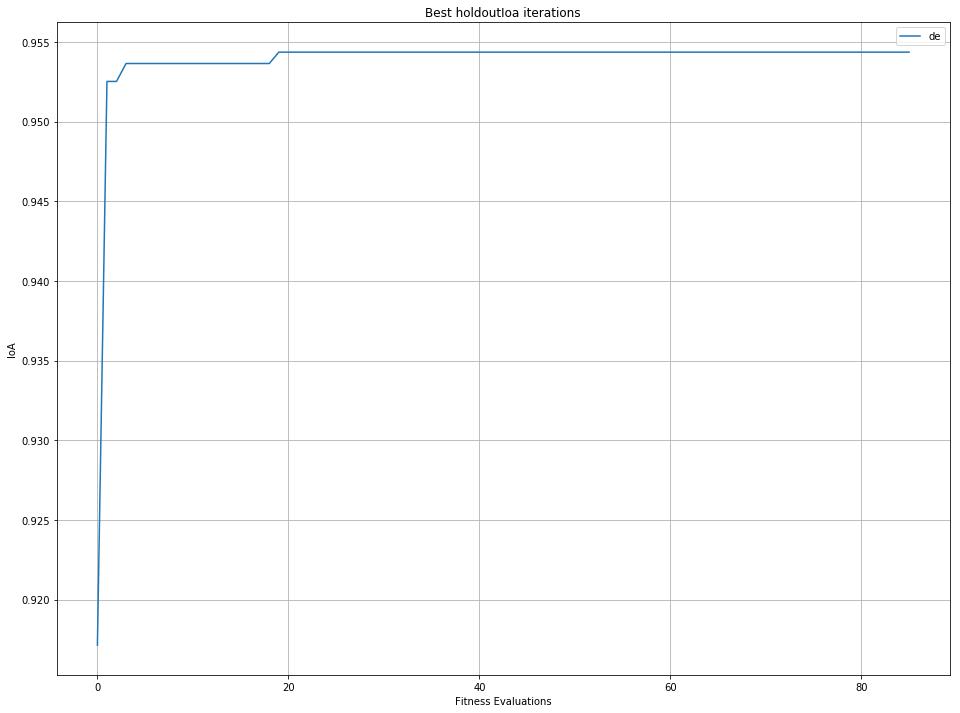

In [103]:
fpath = "../models/NarxModelSearch/runs/4gpu4De5agents20iters4islandsEvery10Rand2expBest2exp/logs/"

# randDf = pd.read_csv(fpath + randFname)
# randDf["datetime"] = pd.to_datetime(randDf["datetime"])
# psoDf = pd.read_csv(fpath + psoFname)
# psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
deDf = pd.read_csv(fpath + deFname)
deDf["datetime"] = pd.to_datetime(psoDf["datetime"])

column = "holdoutIoa"
steps = 120
# psoMseMin = getMaximizingArray(psoDf.head(steps), column)
# randMseMin = getMaximizingArray(randDf.head(steps), column)
deMseMin = getMaximizingArray(deDf.head(steps), column)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel('IoA')
ax.set_xlabel('Fitness Evaluations')
ax.set_title('Best {} iterations'.format(column))
ax.grid(True)
# ax.plot(randMseMin);
# ax.plot(psoMseMin);
ax.plot(deMseMin);
ax.legend(["de"]);

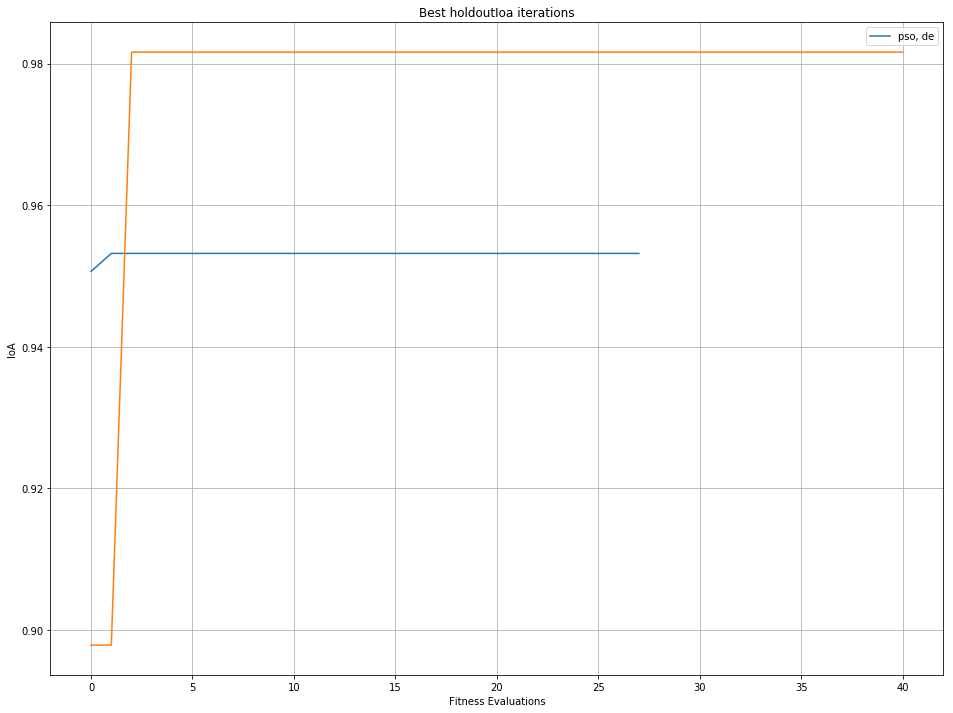

In [106]:
fpath = "../models/NarxModelSearch/runs/4gpuPsoDe5agents20iters4islandsEvery10/logs/"

# randDf = pd.read_csv(fpath + randFname)
# randDf["datetime"] = pd.to_datetime(randDf["datetime"])
psoDf = pd.read_csv(fpath + psoFname)
psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
deDf = pd.read_csv(fpath + deFname)
deDf["datetime"] = pd.to_datetime(psoDf["datetime"])

column = "holdoutIoa"
steps = 120
psoMseMin = getMaximizingArray(psoDf.head(steps), column)
# randMseMin = getMaximizingArray(randDf.head(steps), column)
deMseMin = getMaximizingArray(deDf.head(steps), column)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel('IoA')
ax.set_xlabel('Fitness Evaluations')
ax.set_title('Best {} iterations'.format(column))
ax.grid(True)
# ax.plot(randMseMin);
ax.plot(psoMseMin);
ax.plot(deMseMin);
ax.legend(["pso, de"]);

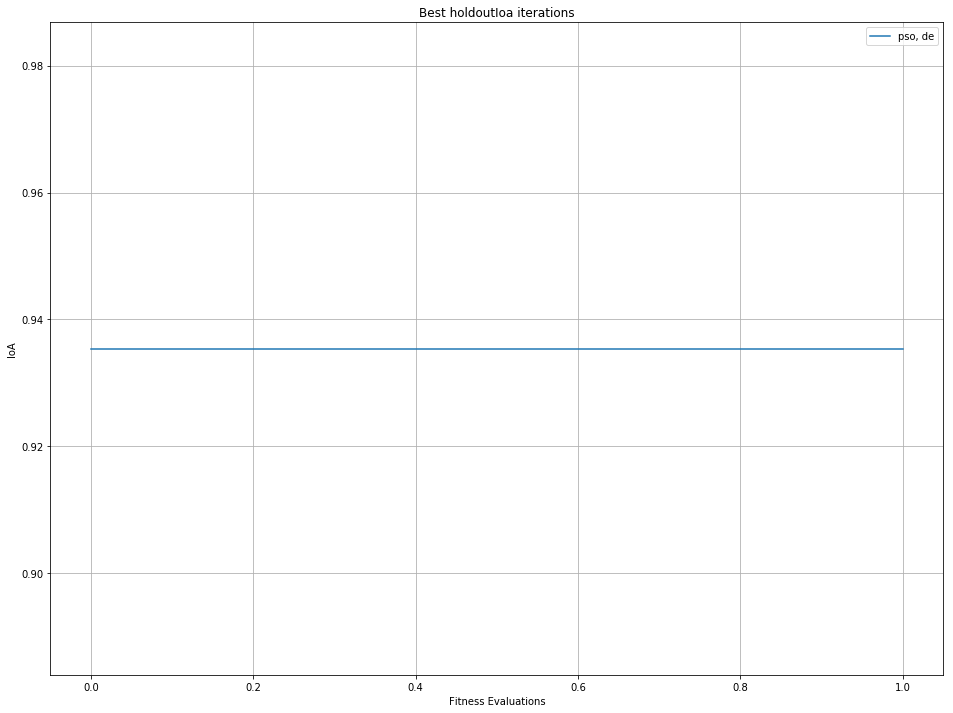

In [118]:
fpath = "../models/NarxModelSearch/logs/"

# randDf = pd.read_csv(fpath + randFname)
# randDf["datetime"] = pd.to_datetime(randDf["datetime"])
psoDf = pd.read_csv(fpath + psoFname)
psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
# deDf = pd.read_csv(fpath + deFname)
# deDf["datetime"] = pd.to_datetime(psoDf["datetime"])

column = "holdoutIoa"
steps = 120
psoMseMin = getMaximizingArray(psoDf.head(steps), column)
# randMseMin = getMaximizingArray(randDf.head(steps), column)
# deMseMin = getMaximizingArray(deDf.head(steps), column)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel('IoA')
ax.set_xlabel('Fitness Evaluations')
ax.set_title('Best {} iterations'.format(column))
ax.grid(True)
# ax.plot(randMseMin);
ax.plot(psoMseMin);
# ax.plot(deMseMin);
ax.legend(["pso, de"]);